<a href="https://colab.research.google.com/github/sarveshgitdev/tinyML/blob/main/2_2_derivative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[-5.         -4.91457286 -4.82914573 -4.74371859 -4.65829146 -4.57286432
 -4.48743719 -4.40201005 -4.31658291 -4.23115578 -4.14572864 -4.06030151
 -3.97487437 -3.88944724 -3.8040201  -3.71859296 -3.63316583 -3.54773869
 -3.46231156 -3.37688442 -3.29145729 -3.20603015 -3.12060302 -3.03517588
 -2.94974874 -2.86432161 -2.77889447 -2.69346734 -2.6080402  -2.52261307
 -2.43718593 -2.35175879 -2.26633166 -2.18090452 -2.09547739 -2.01005025
 -1.92462312 -1.83919598 -1.75376884 -1.66834171 -1.58291457 -1.49748744
 -1.4120603  -1.32663317 -1.24120603 -1.15577889 -1.07035176 -0.98492462
 -0.89949749 -0.81407035 -0.72864322 -0.64321608 -0.55778894 -0.47236181
 -0.38693467 -0.30150754 -0.2160804  -0.13065327 -0.04522613  0.04020101
  0.12562814  0.21105528  0.29648241  0.38190955  0.46733668  0.55276382
  0.63819095  0.72361809  0.80904523  0.89447236  0.9798995   1.06532663
  1.15075377  1.2361809   1.32160804  1.40703518  1.49246231  1.57788945
  1.66331658  1.74874372  1.83417085  1.91959799  2

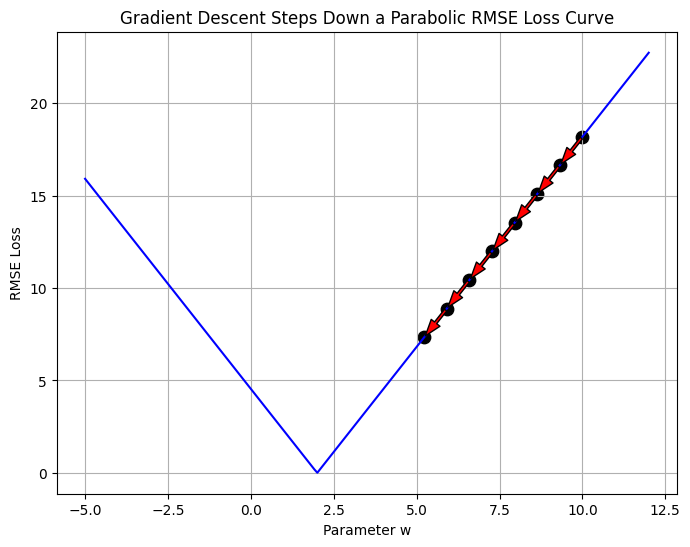

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# X and Y (actual points)
X = np.array([-1, 0, 1, 2, 3, 4])
Y_true = np.array([-3, -1, 1, 3, 5, 7])

# Fixed b, only optimizing w for one-dimensional movement (the "curve" in the diagram)
b = -1

# Loss curve for a range of w values
w_range = np.linspace(-5, 12, 200)

print(w_range)

rmse_loss = []
for w in w_range:
    Y_pred = w * X + b
    loss = np.sqrt(np.mean((Y_pred - Y_true) ** 2))
    rmse_loss.append(loss)

# Gradient descent step-by-step visualization
w_current = 10.0  # Start "high up the curve"
learning_rate = 0.3   # Large enough for visible jumps
iterations = 7
ws = [w_current]  # List to store each w value during descent
losses = []

for step in range(iterations):
    Y_pred = w_current * X + b
    loss = np.sqrt(np.mean((Y_pred - Y_true)**2))
    losses.append(loss)
    # Full derivative of RMSE loss w.r.t. w (chain rule, no simplification)
    residuals = Y_true - Y_pred
    if loss != 0:
        dMSE_dw = (2/len(X)) * np.sum(residuals * (-X))
        dRMSE_dw = (1 / (2 * loss)) * dMSE_dw
    else:
        dRMSE_dw = 0

    # Gradient descent update rule
    w_current = w_current - learning_rate * dRMSE_dw
    ws.append(w_current)

# Create the descent animation: plot each step as in your diagram
plt.figure(figsize=(8, 6))
plt.plot(w_range, rmse_loss, color='blue')
for i in range(len(ws)-1):
    w, w_next = ws[i], ws[i+1]
    # Current position
    loss_now = np.sqrt(np.mean((w * X + b - Y_true) ** 2))
    plt.scatter(w, loss_now, color='black', s=80)
    # Draw the gradient step as an arrow
    plt.annotate('', xy=(w_next, np.sqrt(np.mean((w_next * X + b - Y_true) ** 2))),
                 xytext=(w, loss_now),
                 arrowprops=dict(facecolor='red', shrink=0.05, width=2, headwidth=8))

plt.scatter(ws[-1], np.sqrt(np.mean((ws[-1] * X + b - Y_true) ** 2)), color='black', s=80)
plt.xlabel('Parameter w')
plt.ylabel('RMSE Loss')
plt.title('Gradient Descent Steps Down a Parabolic RMSE Loss Curve')
plt.grid(True)
plt.show()
